In [109]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

import qutip as qp
from IPython.display import Image
qp.basis(2,1)
qp.basis(2,0)

Quantum object: dims = [[2], [1]], shape = [2, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]]

In [103]:
def ramsey(Omega, tau, detuning, phi, T):
    rhoee = 4*Omega**2*tau**2/(np.pi**2) * (np.sin(detuning*tau/2)/(tau*detuning/2))**2 * np.cos((detuning*T + phi)/2)**2
    return rhoee

def rabi(omega, on_time, delta, init_time=0.0, collapse=0.0*qp.sigmaz(), init_state=qp.Qobj([[0], [1]]), pi_pulse=0.5):
    H_free = -delta/2.0*qp.sigmaz()
    H_int = qp.sigmax()*omega/2.0 + H_free
    tlist = np.linspace(init_time, on_time, 1000)
    result = qp.mesolve(H_free + H_int, init_state, tlist, [collapse], [qp.basis(2,0)*qp.basis(2,0).dag()])
    return result

<IPython.core.display.Javascript object>


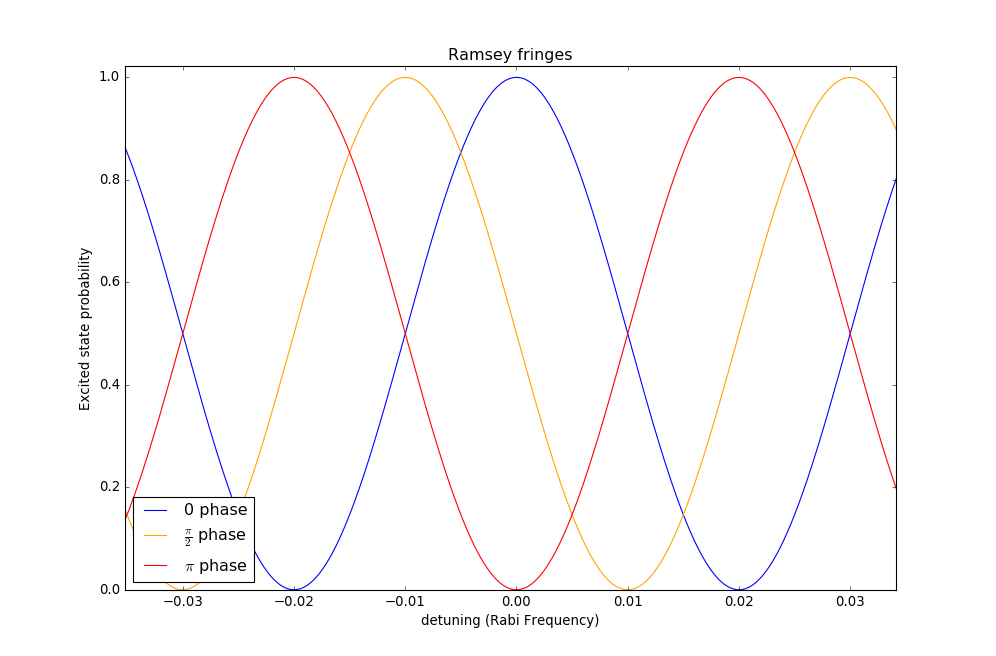

In [39]:
Omega = 1
tau = np.pi/(2*Omega)
T = 100*tau
phi= [0.0, np.pi/2, np.pi]
detunings = np.linspace(-.05, 0.05, 10000) 

excited_pop1 = ramsey(Omega, tau, detunings, phi[0], T)
excited_pop2 = ramsey(Omega, tau, detunings, phi[1], T)
excited_pop3 = ramsey(Omega, tau, detunings, phi[2], T)
plt.plot(detunings, excited_pop1, 'b', label='0 phase')
plt.plot(detunings, excited_pop2, 'orange', label=r'$\frac{\pi}{2}$ phase')
plt.plot(detunings, excited_pop3, 'red', label=r'$\pi$ phase')
plt.legend(loc=3)
plt.title('Ramsey fringes')
plt.xlabel('detuning (Rabi Frequency)')
plt.ylabel('Excited state probability')

<IPython.core.display.Javascript object>


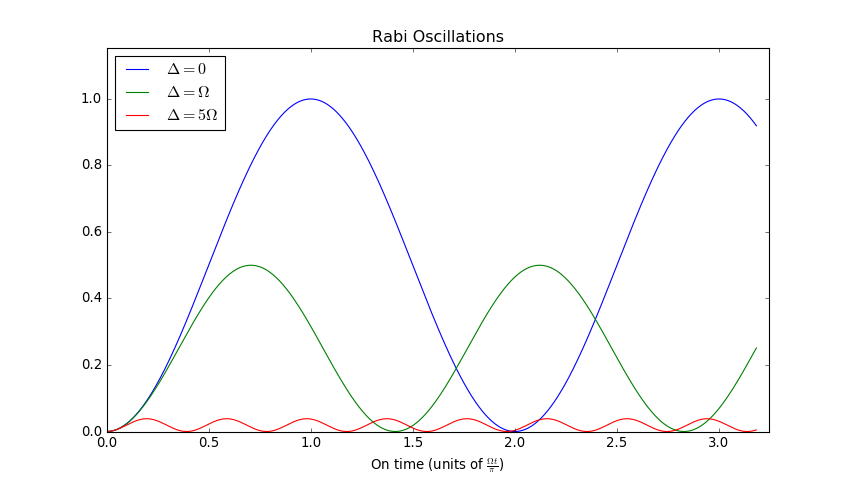

In [83]:
result1 = rabi(omega=1, on_time=10, delta=0.0, collapse=0*qp.sigmaz())
result2 = rabi(omega=1, on_time=10, delta=1.0, collapse=0*qp.sigmaz())
result3 = rabi(omega=1, on_time=10, delta=5.0, collapse=0*qp.sigmaz())
plt.plot(result1.times/np.pi, result1.expect[0], label = r'$\Delta = 0$')
plt.plot(result2.times/np.pi, result2.expect[0], label = r'$\Delta = \Omega$')
plt.plot(result3.times/np.pi, result3.expect[0], label = r'$\Delta = 5\Omega$')
plt.xlabel(r'On time (units of $\frac{\Omega t}{\pi}$)')
plt.legend(loc=2)
plt.title('Rabi Oscillations')

<IPython.core.display.Javascript object>


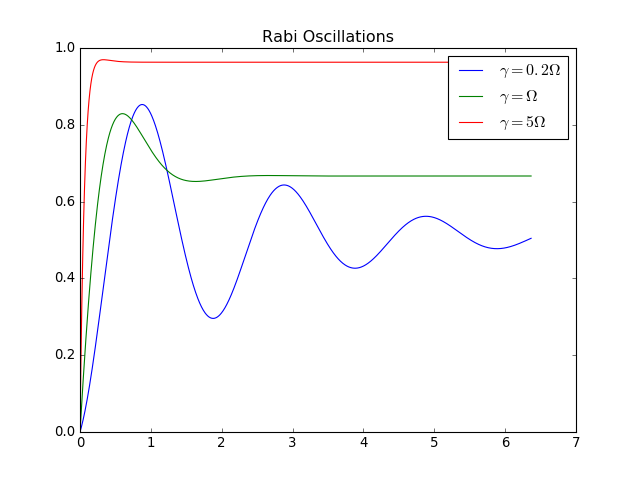

In [110]:
result1 = rabi(omega=1, on_time=20, delta=0.0, collapse=np.sqrt(0.2)*qp.sigmap())
result2 = rabi(omega=1, on_time=20, delta=0.0, collapse=np.sqrt(1)*qp.sigmap())
result3 = rabi(omega=1, on_time=20, delta=0.0, collapse=np.sqrt(5)*qp.sigmap())
plt.plot(result1.times/np.pi, result1.expect[0], label = r'$\gamma = 0.2\Omega$')
plt.plot(result2.times/np.pi, result2.expect[0], label = r'$\gamma = \Omega$')
plt.plot(result3.times/np.pi, result3.expect[0], label = r'$\gamma = 5\Omega$')
plt.legend()
plt.title('Rabi Oscillations')

In [89]:
rho0 = 0.5*qp.basis(2,0)*qp.basis(2,0).dag() + 0.5*qp.basis(2,1)*qp.basis(2,1).dag()
print rho0

Quantum object: dims = [[2], [2]], shape = [2, 2], type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.   0.5]]


<IPython.core.display.Javascript object>


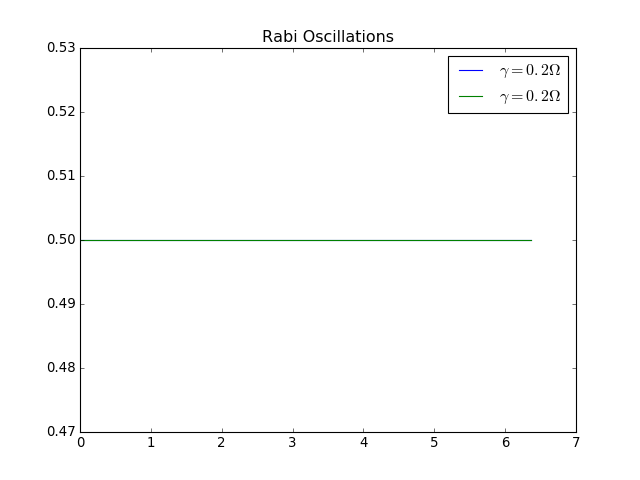

In [107]:
result1 = rabi(omega=1, on_time=20, delta=0.0, collapse=0.2*qp.sigmaz(), init_state=rho0)
bell = 1/np.sqrt(2)*(qp.basis(2,0) + qp.basis(2,1))
result2 = rabi(omega=1, on_time=20, delta=0.0, collapse=0.2*qp.sigmaz(), init_state= bell)
plt.plot(result1.times/np.pi, result1.expect[0], label = r'$\gamma = 0.2\Omega$')
plt.plot(result2.times/np.pi, result2.expect[0], label = r'$\gamma = 0.2\Omega$')
plt.legend()
plt.title('Rabi Oscillations')